## House Prices Model
By Mahfuz Miah, Nov 4th, 2019

### Task Summary:
The housing market is one of the most crucial parts of the economy for every country. Purchasing a home is one of the primary ways to build wealth and savings for people. In this respect, predicting prices in the housing market is a very central topic in economic and financial circles.

The house price dataset from Kaggle includes several features of the houses along with their sale prices at the time they are sold. So far, in this module, you built and implemented some models using this dataset.

In this challenge, you are required to improve your model with respect to its prediction performance.

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks:

**Steps**
1. Load the houseprices data from Thinkful's database.
2. Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.
3. Now, split your data into train and test sets where 20% of the data resides in the test set.
4. Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!
5. Evaluate your best model on the test set.
6. So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

For description of dataset, please see: https://github.com/shahwaiz14/Predicting-House-Prices/blob/master/data_description.txt
        

### Step 1: Load the houseprices data from Thinkful's database.

In [95]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn import linear_model
from fractions import Fraction
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import normaltest

import warnings
warnings.filterwarnings('ignore')

In [96]:
# define postgres credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [97]:
# define dataframe extracted from sql query
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


houseprices_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [98]:
# Let's preview the data
houseprices_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [99]:
# What are the different objects in the dataframe
houseprices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [100]:
# Let's get an overview of some stats of the current data.
houseprices_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Step 2: Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.

First let's see what columns have missing data.

In [101]:
# define function that returns a dataframe with fraction and percent of missing data 
# for each column

def percent_missing (df):
    numer = df.isnull().sum() 
    denom = df.isnull().count()

    data= []
    i = 0
    for x,y in zip(numer,denom):
        data.append([numer.index[i],(Fraction(x,y)), x*100/y])
        i+=1
    
    df1 = pd.DataFrame(data,columns = ['Column_Name', 'Fraction of Missing Data','Percent'])
    return df1

# preview this function in action with our defined dataframe
percent_missing(houseprices_df)

,Column_Name,Fraction of Missing Data,Percent
0,id,0,0.000000
1,mssubclass,0,0.000000
2,mszoning,0,0.000000
3,lotfrontage,259/1460,17.739726
4,lotarea,0,0.000000
...,...,...,...
76,mosold,0,0.000000
77,yrsold,0,0.000000
78,saletype,0,0.000000
79,salecondition,0,0.000000


In [102]:
# use above function to return dataframe containing only columns that have some missing data
def missing_data (df):
    missingdf = percent_missing(df)
    missingdf1 = missingdf[missingdf['Fraction of Missing Data'] > 0]
    print(f'{missingdf1.shape[0]} out of {missingdf.shape[0]} columns have missing data')
    return missingdf1

missing_df1 = missing_data(houseprices_df)

19 out of 81 columns have missing data


In [9]:
# see the dataframe with only columns that have missing data
missing_df1

,Column_Name,Fraction of Missing Data,Percent
3,lotfrontage,259/1460,17.739726
6,alley,1369/1460,93.767123
25,masvnrtype,2/365,0.547945
26,masvnrarea,2/365,0.547945
30,bsmtqual,37/1460,2.534247
31,bsmtcond,37/1460,2.534247
32,bsmtexposure,19/730,2.602740
33,bsmtfintype1,37/1460,2.534247
35,bsmtfintype2,19/730,2.602740
42,electrical,1/1460,0.068493


In [10]:
# define functions that will return the number or numeric or non-numeric columns

def num_col (df):
    numeric_columns = df.select_dtypes(['int64','float64']).columns
    print(f"The number of numerical columns is {len(numeric_columns)}")
    return numeric_columns

def non_num_col (df):
    non_numeric_columns = df.select_dtypes(['object']).columns
    print(f"The number of non-numerical columns is {len(non_numeric_columns)}")
    return non_numeric_columns


In [50]:
# how many of our columns are numeric?
numeric_columns = num_col(houseprices_df)
numeric_columns

The number of numerical columns is 38


Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [51]:
# how many of our columns are non-numeric?
non_numeric_columns = non_num_col(houseprices_df)
non_numeric_columns

The number of non-numerical columns is 43


Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

In [52]:
# define function that will graph the % of nulls per columns vs % of columns

def visualize_nulls (df,subset=None):
    if subset is None:
        subset = df.columns
    plt.figure(figsize=(4,4))
    sns.distplot(df[subset].isnull().sum()/df.shape[0]*100, kde=False)
    plt.xlabel('% of nulls per column', size=16)
    plt.ylabel('% of columns', size=16)
    plt.show()


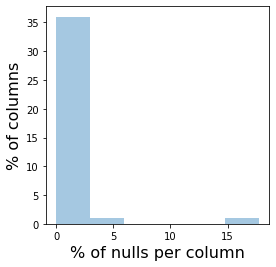

In [53]:
# visualize % of nulls per column in this subset of numeric columns
visualize_nulls(houseprices_df,numeric_columns)

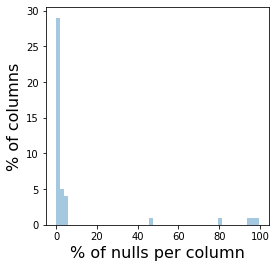

In [54]:
# visualize % of nulls per column in this subset of categorical columns
visualize_nulls(houseprices_df,non_numeric_columns)

### Decisions and explanations on some of these missing columns

In [66]:
# def intersection function that will take two lists and give you 
# what is common between them (intersection, in logic terms)

def intersection(lst1, lst2): 
    temp = set(lst2) 
    lst3 = [value for value in lst1 if value in temp] 
    return lst3 

In [67]:
# get a list of all the columns with missing data
missinglist = missing_df1["Column_Name"].tolist()
missinglist

['lotfrontage',
 'alley',
 'masvnrtype',
 'masvnrarea',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'electrical',
 'fireplacequ',
 'garagetype',
 'garageyrblt',
 'garagefinish',
 'garagequal',
 'garagecond',
 'poolqc',
 'fence',
 'miscfeature']

In [68]:
# what is the list of numeric columns that have missing entries
missing_num = intersection(missinglist, numeric_columns)
missing_num

['lotfrontage', 'masvnrarea', 'garageyrblt']

In [69]:
# what is the list of categorical columns that have missing entries
missing_nn = intersection(missinglist, non_numeric_columns)
missing_nn

['alley',
 'masvnrtype',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'electrical',
 'fireplacequ',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'poolqc',
 'fence',
 'miscfeature']

Let's tackle each of these columns piecemeal

Lot Frontage is usually used as a readout of lot width; one can use this value along with lot area to estimate depth for most lots (assuming the lot is close to a rectangle in shape). Link: https://www.gimme-shelter.com/frontage-50043/.
There are a couple ways to deal with this data:
    - by replacing them with the average lot footage for the entire column so that the column mean does not change
    - by replacing them with the square root of the available lot area since it would reflect the lot footage of a lot that was equally wide as it was deep. (In most cases the width is actually shorter so we would be confidant that this estimate is not far from the reality nor underestimating too much.)
    
Here, we will execute the second choice.

In [126]:
# import math module 
import math 
houseprices_df1a = houseprices_df.copy()

In [127]:
# set variable 'estimate' to the sqrt of lot area for each entry
estimate = (houseprices_df1a.loc[houseprices_df1a['lotfrontage'].isna(), 
                                'lotarea']).apply(lambda x: math.sqrt(x))

In [128]:
estimate

7       101.892100
12      113.877127
14      104.498804
16      106.023582
24       90.807489
           ...    
1429    112.008928
1431     70.199715
1441     66.528190
1443     94.095696
1446    161.684879
Name: lotarea, Length: 259, dtype: float64

In [130]:
# replace nulls with our new estimate
houseprices_df1a.loc[houseprices_df1a['lotfrontage'].isna(), 'lotfrontage'] = houseprices_df1a.loc[houseprices_df1a['lotfrontage'].isna(), 'lotfrontage'].fillna(estimate)

In [131]:
# we now have no more nulls in this column
houseprices_df1a['lotfrontage'].isna().value_counts()

False    1460
Name: lotfrontage, dtype: int64

In [133]:
# let's take a peek at the missing lotfrontage values
houseprices_df[['lotfrontage','lotarea']].loc[houseprices_df.lotfrontage.isna()]

,lotfrontage,lotarea
7,NaN,10382
12,NaN,12968
14,NaN,10920
16,NaN,11241
24,NaN,8246
...,...,...
1429,NaN,12546
1431,NaN,4928
1441,NaN,4426
1443,NaN,8854


In [136]:
# here, we make sure that the values we replaced in lotfrontage make sense
houseprices_df1a[['lotfrontage','lotarea']].loc[houseprices_df.lotfrontage.isna()]

,lotfrontage,lotarea
7,101.892100,10382
12,113.877127,12968
14,104.498804,10920
16,106.023582,11241
24,90.807489,8246
...,...,...
1429,112.008928,12546
1431,70.199715,4928
1441,66.528190,4426
1443,94.095696,8854


In [137]:
# let's check another column with missing data: masvnrarea 
# masvnrtype is also related and missing data so let's look there too
houseprices_df1a.loc[houseprices_df1a["masvnrarea"].isnull(),["masvnrtype","masvnrarea"]]

,masvnrtype,masvnrarea
235,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1244,None,NaN
1278,None,NaN


These 8 entries have null equivalent values for both masvnrtype and masvnrarea, two of the columns with missing data that we are examining.

In [138]:
# we suspect that the entries properly labeled None are actually string entries... let's see
houseprices_df1a.loc[houseprices_df1a["masvnrtype"] == "None",["masvnrtype","masvnrarea"]]

,masvnrtype,masvnrarea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
...,...,...
1454,None,0.0
1455,None,0.0
1457,None,0.0
1458,None,0.0


Here, we see that 864 rows have values as 'None' for masvnrtype, meaning there is no masonry veneer on this property. That is completely possible as most properties don't feature mason walls of any kind at the front of the property. Clearly, these are properly labeled with the word 'None'. However, as we saw in the previous code cell, there are 8 entries that didn't have a string entry of 'None' but rather the Python keyword None instead for column masvnrtype. For these values, NaN was the corresponding entry in masvnrarea. This can be rectified by replacing the keyword None with string 'None' for masvnrtype and replacing NaN with 0 for masvnrarea.


In [151]:
# let's replace NaN for masvnrarea for now with zeros. We will handle masvnrtype shortly
houseprices_df1b = houseprices_df1a.copy() 
houseprices_df1b.loc[
    houseprices_df1b["masvnrarea"].isna(), 'masvnrarea'] = houseprices_df1b.loc[
    houseprices_df1b["masvnrarea"].isna(), "masvnrarea"].fillna(0)

In [143]:
# verify that former NaNs of masvnrarea column are now zeros
houseprices_df1b.loc[houseprices_df["masvnrarea"].isnull(),["masvnrtype","masvnrarea"]]

,masvnrtype,masvnrarea
235,None,0.0
529,None,0.0
650,None,0.0
936,None,0.0
973,None,0.0
977,None,0.0
1244,None,0.0
1278,None,0.0


The last numeric column to deal with is: garageyrblt
However, there are a lot of non_numeric columns related to garages that also have missing values. Let's look at them all at the same time:

In [150]:
# let's look at all the garage related columns
houseprices_df1b.loc[
    houseprices_df1b[
        "garageyrblt"].isna(), houseprices_df1b.columns.str.contains("garage")]

,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond
39,None,NaN,None,0,0,None,None
48,None,NaN,None,0,0,None,None
78,None,NaN,None,0,0,None,None
88,None,NaN,None,0,0,None,None
89,None,NaN,None,0,0,None,None
...,...,...,...,...,...,...,...
1349,None,NaN,None,0,0,None,None
1407,None,NaN,None,0,0,None,None
1449,None,NaN,None,0,0,None,None
1450,None,NaN,None,0,0,None,None


garageyrblt is the year that a garage was built. Upon inspection of the missing_df1 dataframe, we see that along with this column, there are four other garage related columns missing the same amount of data. When we line these garage related columns next to one another, we see that the problem of empty columns arises from the fact that no garage exists in the first place to further characterize. We can fill these with appropriate values of "None" (for non-numeric columns) and 1000 (for a easily recognizable dummy year).

In [152]:
# let's replace NaN for garageyrblt for now with zeros. We will handle the remaining
# non-numeric columns shortly
houseprices_df1c = houseprices_df1b.copy() 
houseprices_df1c.loc[
    houseprices_df1c["garageyrblt"].isna(), "garageyrblt"] = houseprices_df1c.loc[
    houseprices_df1c["garageyrblt"].isna(), "garageyrblt"].fillna(1000)

In [149]:
# let's look to see that the garageyrblt column is properly filled
houseprices_df1c.loc[houseprices_df1c[
    "garagetype"].isna() ,houseprices_df1c.columns.str.contains("garage")]

,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond
39,None,1000.0,None,0,0,None,None
48,None,1000.0,None,0,0,None,None
78,None,1000.0,None,0,0,None,None
88,None,1000.0,None,0,0,None,None
89,None,1000.0,None,0,0,None,None
...,...,...,...,...,...,...,...
1349,None,1000.0,None,0,0,None,None
1407,None,1000.0,None,0,0,None,None
1449,None,1000.0,None,0,0,None,None
1450,None,1000.0,None,0,0,None,None


In [160]:
# let's take a look at the non_numeric columns now. Let's see what is in the alley column
houseprices_df1c["alley"].unique()

array([None, 'Grvl', 'Pave'], dtype=object)

In [161]:
# what are the counts for each value in this column?
houseprices_df1c["alley"].value_counts()

Grvl    50
Pave    41
Name: alley, dtype: int64

In [162]:
houseprices_df1c["alley"].isna().value_counts()
# here we see that the 1369 missing values are 
# the null values that properly refer to no existing alley for the property.
# we just need to replace None with 'None" 

True     1369
False      91
Name: alley, dtype: int64

In [165]:
# let's take a look at one of the columns with a lot of missing data 
# here we look at fireplacequ - I suspect the data isn't actually missing
houseprices_df1c.loc[houseprices_df1c["fireplacequ"].isna(),["fireplaces","fireplacequ"]]

,fireplaces,fireplacequ
0,0,None
5,0,None
10,0,None
12,0,None
15,0,None
...,...,...
1452,0,None
1453,0,None
1454,0,None
1458,0,None


In [166]:
# let's check further - what are the unique values in this column with supposedly missing values
houseprices_df1c["fireplacequ"].unique()

array([None, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

Clearly, it makes sense that there would be no quality for a non-existant fireplace. The Python keyword None is being read as null in our code but properly describes the circumstance; there is no quality for instances of 0 fireplaces.

Regarding other non_numeric columns:

The following columns have a lot of missing data, greater than 45%:
fireplacequ	(47.260274), poolqc	(99.520548), fence (80.753425), miscfeature	(96.301370)
These are all categorical columns and it seems that the missing data from these columns are simply instances where a house does not have the feature in question. That is to say, if a property does not have a fireplace or a pool or a fence or anything miscellaneous worthy of noting, then the respective column was either incorrectly left empty or properly filled with the Python keyword None. Here, we verified that the columns were correctly filled with the word None. 

** We replace these with the stand-in word, "None", that can reflect that the feature does not exist while not coming up as a null when Python code is executed. **


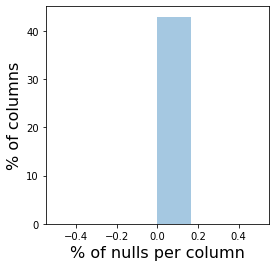

In [171]:
# set a new df variable to reflect completed cleaning
houseprices_df2 = houseprices_df1c.copy()

# set variable that will have a list of all the columns that need nulls filled
fill_cols = missing_nn
for col in fill_cols: 
    # fill_cols was previously defined as the list of columns that has NA values
    houseprices_df2.loc[houseprices_df2[col].isna(), col] = houseprices_df2.loc[houseprices_df2[col].isna(), col].fillna("None")
    # replace all None with "None". This prevents the entry from being counted at null.

# check if all non_numeric_columns are now all filled, visually
visualize_nulls(houseprices_df1,non_numeric_columns)

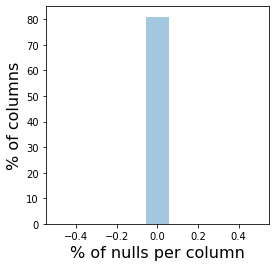

In [172]:
# let us check all the columns for good measure
visualize_nulls(houseprices_df2)

## Exploratory Data Analysis:
Explore the data and find some variables that you think would be useful in predicting house prices.

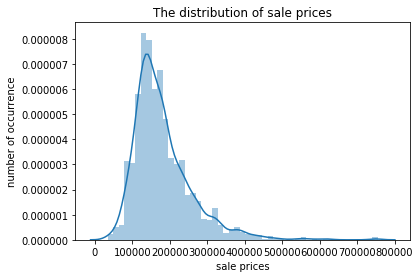

In [173]:
# what does the distribution of prices look like?
sns.distplot(houseprices_df2.saleprice)
plt.title("The distribution of sale prices")
plt.xlabel("sale prices")
plt.ylabel("number of occurrence")
plt.show()

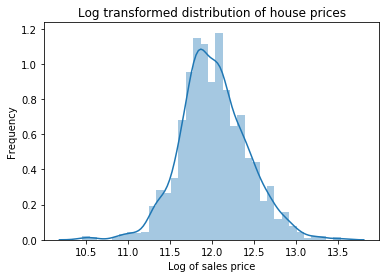

In [174]:
# log transform data to make it closer to normal. Then, check normality of distribution
sns.distplot(np.log(houseprices_df2.saleprice))
plt.title("Log transformed distribution of house prices")
plt.xlabel("Log of sales price")
plt.ylabel("Frequency")
plt.show()

In [175]:
# normality test
# H0: null hypothesis is that the sample was drawn from a Gaussian distribution.
stat, p = normaltest(np.log(houseprices_df2.saleprice))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05         
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=25.507, p=0.000
Sample does not look Gaussian (reject H0)


Though the log of salesprice is still not normally distributed as per SciPy's normaltest (D’Agostino's K^2 test), this distribution is definitely more normal than the raw salesprice distribution. 

In [177]:
# what features correlate well with saleprice?
houseprices_df2[numeric_columns].corr()['saleprice'].sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
masvnrarea       0.472614
fireplaces       0.466929
bsmtfinsf1       0.386420
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
lotfrontage      0.286676
garageyrblt      0.285548
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
threessnporch    0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
id              -0.021917
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
mssubclass      -0.084284
enclosedporch   -0.128578
kitchenabvgr    -0.135907
Name: salepr

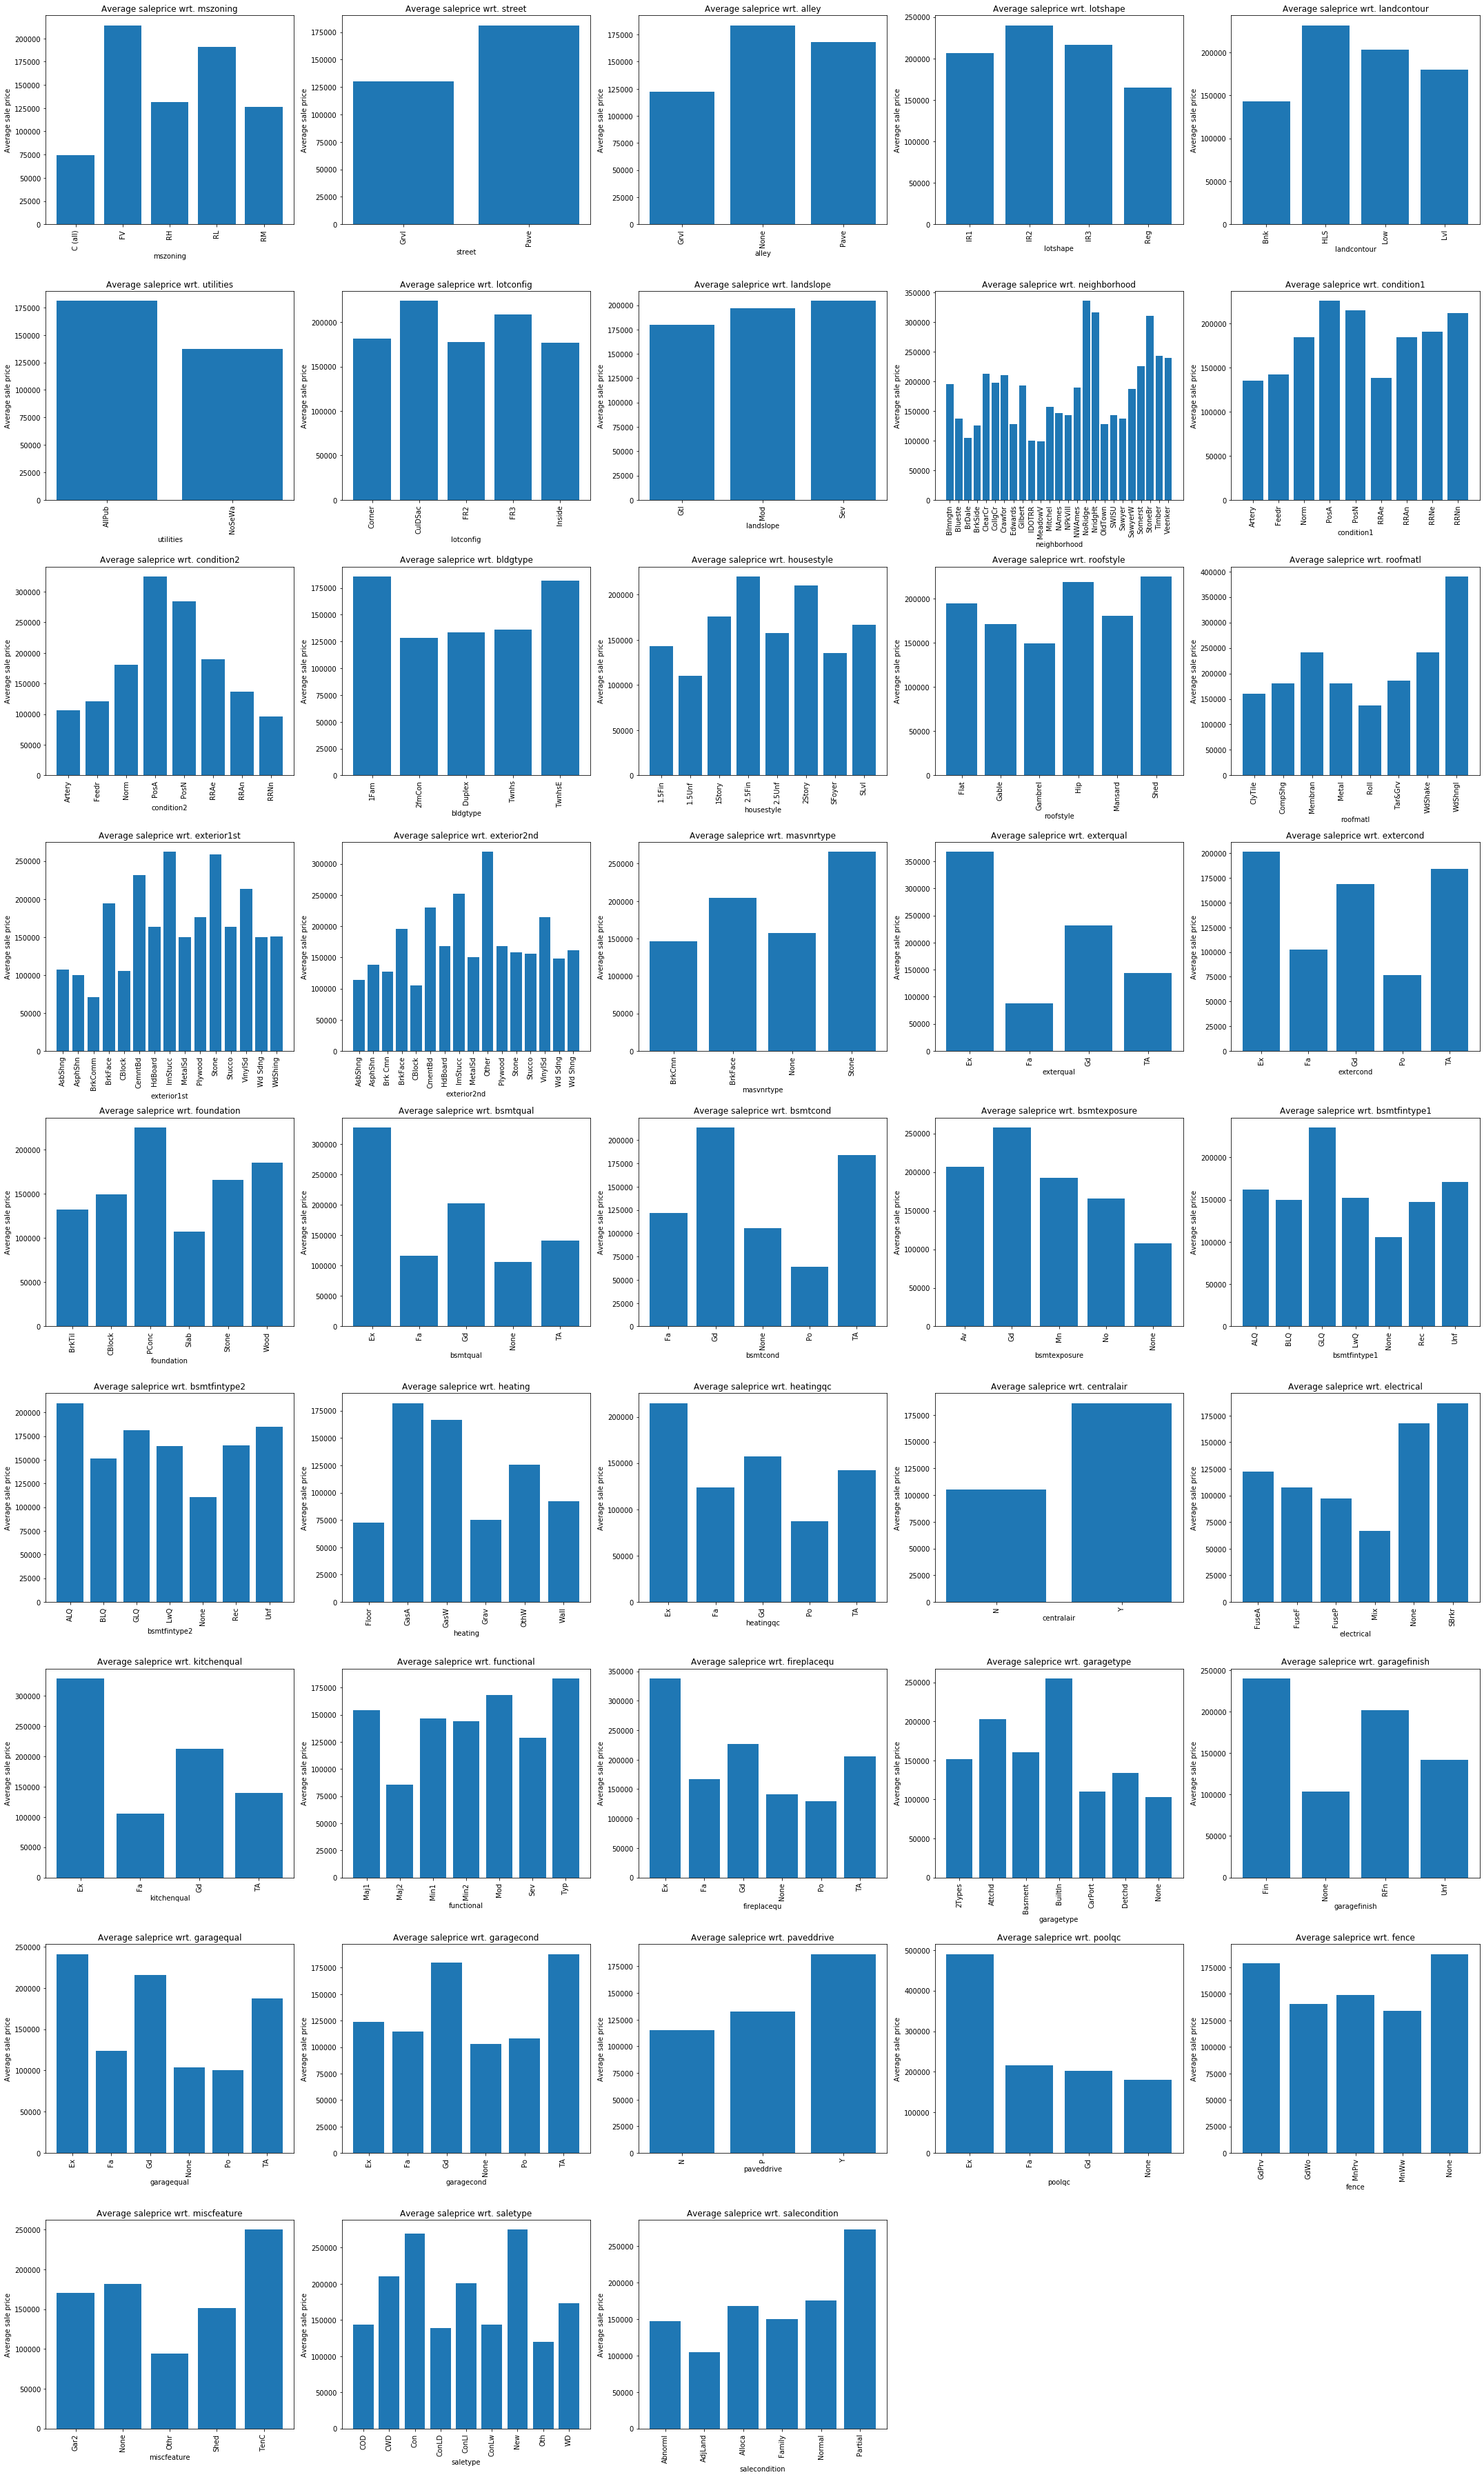

In [178]:
# make graphs to visualize variation in categorical columns; choose 2 variables that show variance wrt to sale price
plt.figure(figsize=(30,50))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(9,5,index+1)
    plt.bar(houseprices_df2.groupby(column)["saleprice"].mean().index, houseprices_df2.groupby(column)["saleprice"].mean())
    plt.title(f"Average saleprice wrt. {column}")
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [196]:
print (houseprices_df2.groupby('saletype'))

In [201]:
# # make graphs to visualize variation in categorical columns; choose 2 variables that show variance wrt to sale price
# plt.figure(figsize=(30,50))

# for index, column in enumerate(non_numeric_columns):
#     plt.subplot(9,5,index+1)
    
#     #g = houseprices_df2.groupby(column)
#     #g.groups.keys()
#     #list(g.groups)
    
#     #houseprices_df2.groupby(column)['saleprice'].plot.box(x = g.groups.keys(), y = 'saleprice')
    
#     grouped = houseprices_df2['saleprice'].groupby(column).T
#     grouped.boxplot()
    
#     plt.title(f"Average saleprice wrt. {column}")
#     plt.ylabel("Average sale price")
#     plt.xlabel(column)
#     plt.xticks(rotation='vertical')

# plt.tight_layout()
# plt.show()

For our model, we've chosen to add all numerical variables that show correlations of greater than .6 with respect to sale price ('overallqual','grlivarea','garagecars','garagearea','totalbsmtsf','firstflrsf'). We've also added two categorical variables by visually observing the variance in that variable with respect to sale price ('mszoning', 'landcontour'). Below, we convert the categorical variables of interest into dummy variables to utilize them in our model.

In [202]:
# categorical variables of interest
houseprices_df3 = houseprices_df2.copy()
houseprices_df3 = pd.concat([houseprices_df3,pd.get_dummies(houseprices_df3.mszoning, prefix="mszoning", drop_first=True)], axis=1)
houseprices_df3 = pd.concat([houseprices_df3,pd.get_dummies(houseprices_df3.landcontour, prefix="landcontour", drop_first=True)], axis=1)

Get dummy column names to reference for the model:

In [203]:
# get the names of the new columns
dummy_column_names = list(pd.get_dummies(houseprices_df3.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(houseprices_df3.landcontour, prefix="landcontour", drop_first=True).columns)

In [204]:
houseprices_df3.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,saletype,salecondition,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,landcontour_HLS,landcontour_Low,landcontour_Lvl
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,WD,Normal,208500,0,0,1,0,0,0,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,WD,Normal,181500,0,0,1,0,0,0,1
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,WD,Normal,223500,0,0,1,0,0,0,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,WD,Abnorml,140000,0,0,1,0,0,0,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,WD,Normal,250000,0,0,1,0,0,0,1


## Original Model:
Build your initial model using these features and estimate the parameters using OLS

One way to model and get relavent info:

In [205]:
# Y is the target variable
Y = houseprices_df3['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X = houseprices_df3[['overallqual','grlivarea','garagecars','garagearea','totalbsmtsf','firstflrsf'] + dummy_column_names]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [2.33063574e+04 4.56022217e+01 1.26800812e+04 1.42901846e+01
 2.27783468e+01 7.92796867e+00 3.09369566e+04 1.92036117e+04
 3.21508614e+04 1.42686439e+04 3.79510094e+04 4.25055502e+04
 1.91152117e+04]

Intercept: 
 -141386.95635439196


And another way:

In [206]:
# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     384.1
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:10:00   Log-Likelihood:                -17454.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1446   BIC:                         3.501e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.414e+05   1.32e+04    -10.693      0.000   -1.67e+05   -1.15e+05
overallqual      2.331e+04   1091.711     21.348      0.000    2.12e+04    2.54e+04
grlivarea          45.6022      2.634     17.311      0.000      40.435      50.770
garagecars       1.268e+04   2956.100      4.289      0.000    6881.378    1.85e+04
garagearea         14.2902     10.293      1.388      0.165      -5.902      34.482
totalbsmtsf        22.7783      4.216      5.403      0.000      14.509      31.048
firstflrsf          7.9280      4.994      1.587      0.113      -1.869      17.725
mszoning_FV      3.094e+04   1.32e+04      2.340      0.019    5003.376    5.69e+04
mszoning_RH       1.92e+04   1.54e+04      1.247      0.213    -1.1e+04    4.94e+04
mszoning_RL      3.215e+04   1.22e+04      2.625      0.009    8123.864    5.62e+04
mszoning_RM      1.427e+04   1.24e+04      1.148      0.251   -1.01e+04    3.87e+04
landcontour_HLS  3.795e+04   7303.903      5.196      0.000    2.36e+04    5.23e+04
landcontour_Low  4.251e+04   8042.292      5.285      0.000    2.67e+04    5.83e+04
landcontour_Lvl  1.912e+04   4995.106      3.827      0.000    9316.782    2.89e+04
==============================================================================
Omnibus:                      400.570   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34893.371
Skew:                           0.050   Prob(JB):                         0.00
Kurtosis:                      26.950   Cond. No.                     6.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Revisit Model and Improve

In [214]:
houseprices_df4 = houseprices_df3.copy()
# Y is the target variable
Y = houseprices_df4['saleprice']
# X is the feature set
X = houseprices_df4[['overallqual','grlivarea','garagecars','garagearea','totalbsmtsf','firstflrsf'] + dummy_column_names]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     384.1
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:53:18   Log-Likelihood:                -17454.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1446   BIC:                         3.501e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.414e+05   1.32e+04    -10.693      0.000   -1.67e+05   -1.15e+05
overallqual      2.331e+04   1091.711     21.348      0.000    2.12e+04    2.54e+04
grlivarea          45.6022      2.634     17.311      0.000      40.435      50.770
garagecars       1.268e+04   2956.100      4.289      0.000    6881.378    1.85e+04
garagearea         14.2902     10.293      1.388      0.165      -5.902      34.482
totalbsmtsf        22.7783      4.216      5.403      0.000      14.509      31.048
firstflrsf          7.9280      4.994      1.587      0.113      -1.869      17.725
mszoning_FV      3.094e+04   1.32e+04      2.340      0.019    5003.376    5.69e+04
mszoning_RH       1.92e+04   1.54e+04      1.247      0.213    -1.1e+04    4.94e+04
mszoning_RL      3.215e+04   1.22e+04      2.625      0.009    8123.864    5.62e+04
mszoning_RM      1.427e+04   1.24e+04      1.148      0.251   -1.01e+04    3.87e+04
landcontour_HLS  3.795e+04   7303.903      5.196      0.000    2.36e+04    5.23e+04
landcontour_Low  4.251e+04   8042.292      5.285      0.000    2.67e+04    5.83e+04
landcontour_Lvl  1.912e+04   4995.106      3.827      0.000    9316.782    2.89e+04
==============================================================================
Omnibus:                      400.570   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34893.371
Skew:                           0.050   Prob(JB):                         0.00
Kurtosis:                      26.950   Cond. No.                     6.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-squared and adjusted R-squared of the model are 0.775 and 0.773 respectively.
- F statistic and its associated p-value are 384.1 and 0.00 respectively.
- AIC and BIC of the model are 3.494e+04 and 3.501e+04 respectively.

According to the R-squared, about 77% of the variance in the target variable is explained by the model.

In order to increase the goodness of fit of our model:
We can do a log transform of the target variable. Our histogram of the saleprice variable showed us that the data is not normally distributed but that log transforming may help in this regard. We can apply log(1+x) transformation with NumPy.
Next we can add the interaction of the total basement area and the overall quality of the house.

In [215]:
houseprices_df4['sfxoverall'] = houseprices_df4['totalbsmtsf'] * houseprices_df4['overallqual']

We also want to add mortgage APR data; we suspect that lower mortgage rates would help to increase house prices and vice versa.

In [216]:
# Create mortgage APR (annual percent rate) feature

#point to the right file path
mortgage_file_path = '/Users/Mahfuz-Tamim/Thinkful/Supervised Learning/Regression/30-year-fixed-mortgage-rate-chart.csv'
mortgage_apr_df = pd.read_csv(mortgage_file_path, skiprows=15) #skip the beginning rows which is info on the csv file

mortgage_apr_df.head()

,date,value
0,1971-04-01,7.29
1,1971-05-01,7.46
2,1971-06-01,7.54
3,1971-07-01,7.69
4,1971-08-01,7.69


In [217]:
# make appropriate columns from the mortgage df
mortgage_apr_df['date'] = pd.to_datetime( mortgage_apr_df.date, format='%Y-%m-%d')
mortgage_apr_df['year'] = mortgage_apr_df.date.dt.year
mortgage_apr_df['month'] = mortgage_apr_df.date.dt.month

mortgage_apr_df.head()

,date,value,year,month
0,1971-04-01,7.29,1971,4
1,1971-05-01,7.46,1971,5
2,1971-06-01,7.54,1971,6
3,1971-07-01,7.69,1971,7
4,1971-08-01,7.69,1971,8


In [218]:
# here we merge by appropriate month and year, particularly interested in the interest rate value 
# associated with said date.
# Then we drop the date year and month since we don't need them after the merge is properly executed.
houseprices_df4 = pd.merge(houseprices_df4, mortgage_apr_df, left_on=['yrsold','mosold'], 
                           right_on=['year', 'month'], how='left').drop(['date', 'year', 'month'], axis=1)

houseprices_df4.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,landcontour_HLS,landcontour_Low,landcontour_Lvl,sfxoverall,value
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,208500,0,0,1,0,0,0,1,5992,6.24
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,181500,0,0,1,0,0,0,1,7572,6.42
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,223500,0,0,1,0,0,0,1,6440,6.09
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,140000,0,0,1,0,0,0,1,5292,6.26
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,250000,0,0,1,0,0,0,1,9160,5.10


In [219]:
#rename the column appropriately.
houseprices_df4.rename(columns={' value':'interest'}, inplace=True)

houseprices_df4.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,landcontour_HLS,landcontour_Low,landcontour_Lvl,sfxoverall,interest
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,208500,0,0,1,0,0,0,1,5992,6.24
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,181500,0,0,1,0,0,0,1,7572,6.42
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,223500,0,0,1,0,0,0,1,6440,6.09
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,140000,0,0,1,0,0,0,1,5292,6.26
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,250000,0,0,1,0,0,0,1,9160,5.10


In [223]:
# Y is the target variable
Y = (houseprices_df4['saleprice'])
# X is the feature set
X = houseprices_df4[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 
                     'sfxoverall','interest'] + dummy_column_names]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     367.7
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:55:10   Log-Likelihood:                -17436.
No. Observations:                1460   AIC:                         3.490e+04
Df Residuals:                    1445   BIC:                         3.498e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.005e+05   1.67e+04     -6.015      0.000   -1.33e+05   -6.77e+04
overallqual      1.547e+04   1637.754      9.448      0.000    1.23e+04    1.87e+04
grlivarea          45.6786      2.439     18.726      0.000      40.894      50.463
garagecars       1.485e+04   2943.734      5.046      0.000    9079.798    2.06e+04
garagearea          7.2180     10.234      0.705      0.481     -12.856      27.292
totalbsmtsf       -21.3859      8.480     -2.522      0.012     -38.021      -4.751
sfxoverall          7.1843      1.169      6.145      0.000       4.891       9.478
interest         1166.3992   1392.635      0.838      0.402   -1565.404    3898.203
mszoning_FV      3.649e+04   1.31e+04      2.785      0.005    1.08e+04    6.22e+04
mszoning_RH      2.351e+04   1.52e+04      1.544      0.123   -6363.459    5.34e+04
mszoning_RL      3.715e+04   1.21e+04      3.069      0.002    1.34e+04    6.09e+04
mszoning_RM      1.727e+04   1.23e+04      1.405      0.160   -6844.671    4.14e+04
landcontour_HLS  3.918e+04   7220.820      5.427      0.000     2.5e+04    5.33e+04
landcontour_Low  4.453e+04   7954.527      5.599      0.000    2.89e+04    6.01e+04
landcontour_Lvl  2.113e+04   4944.258      4.273      0.000    1.14e+04    3.08e+04
==============================================================================
Omnibus:                      756.979   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107300.824
Skew:                          -1.371   Prob(JB):                         0.00
Kurtosis:                      44.909   Cond. No.                     2.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adjusted R-squared is now .779
F statistic and associated p-value: 396.1 and 0.00
AIC and BIC of the model are -1157 and -1083 respectively.

**Cumulatively, this model does much better than our previous model.**

Columns 'garagearea' and 'interest' do not significantly contribute to the model so they can be dropped. From this, we learn that although we hypothesized some contribution from the 'interest' column as a feature of this model due to domain knowledge on real estate, it ultimately does not improve this model.

In [224]:
# Below, we verify that dropping these two columns does not change our model very much.

# Y is the target variable
Y = (houseprices_df4['saleprice'])
# X is the feature set
X = houseprices_df4[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 
                     'sfxoverall'] + dummy_column_names]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     429.2
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:58:15   Log-Likelihood:                -17437.
No. Observations:                1460   AIC:                         3.490e+04
Df Residuals:                    1447   BIC:                         3.497e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.312e+04   1.49e+04     -6.260      0.000   -1.22e+05   -6.39e+04
overallqual      1.538e+04   1623.559      9.473      0.000    1.22e+04    1.86e+04
grlivarea          45.8334      2.433     18.837      0.000      41.061      50.606
garagecars       1.656e+04   1701.796      9.733      0.000    1.32e+04    1.99e+04
totalbsmtsf       -21.4216      8.459     -2.532      0.011     -38.015      -4.828
sfxoverall          7.2469      1.157      6.262      0.000       4.977       9.517
mszoning_FV      3.653e+04   1.31e+04      2.790      0.005    1.08e+04    6.22e+04
mszoning_RH       2.36e+04   1.52e+04      1.552      0.121   -6228.092    5.34e+04
mszoning_RL      3.694e+04   1.21e+04      3.059      0.002    1.33e+04    6.06e+04
mszoning_RM      1.705e+04   1.23e+04      1.391      0.164   -6990.827    4.11e+04
landcontour_HLS  3.926e+04   7217.012      5.439      0.000    2.51e+04    5.34e+04
landcontour_Low  4.484e+04   7942.578      5.645      0.000    2.93e+04    6.04e+04
landcontour_Lvl  2.121e+04   4940.433      4.293      0.000    1.15e+04    3.09e+04
==============================================================================
Omnibus:                      746.925   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103688.906
Skew:                          -1.343   Prob(JB):                         0.00
Kurtosis:                      44.198   Cond. No.                     2.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Test and Training Data

In [221]:
# import new libraries for training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse


In [225]:
# Y is the target variable
Y = (houseprices_df4['saleprice'])
# X is the feature set
X = houseprices_df4[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 
                     'sfxoverall'] + dummy_column_names]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     334.3
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:59:30   Log-Likelihood:                -13951.
No. Observations:                1168   AIC:                         2.793e+04
Df Residuals:                    1155   BIC:                         2.799e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.101e+05   1.68e+04     -6.564      0.000   -1.43e+05   -7.72e+04
overallqual      1.945e+04   1809.454     10.746      0.000    1.59e+04     2.3e+04
grlivarea          44.2665      2.735     16.183      0.000      38.900      49.633
garagecars       1.743e+04   1935.331      9.008      0.000    1.36e+04    2.12e+04
totalbsmtsf        -4.7761      9.264     -0.516      0.606     -22.953      13.401
sfxoverall          4.1609      1.257      3.311      0.001       1.695       6.627
mszoning_FV       3.11e+04   1.48e+04      2.106      0.035    2126.297    6.01e+04
mszoning_RH      1.881e+04   1.69e+04      1.114      0.265   -1.43e+04    5.19e+04
mszoning_RL      3.365e+04   1.36e+04      2.470      0.014    6915.198    6.04e+04
mszoning_RM      1.223e+04   1.38e+04      0.883      0.377   -1.49e+04    3.94e+04
landcontour_HLS  3.845e+04   7886.747      4.875      0.000     2.3e+04    5.39e+04
landcontour_Low  4.665e+04   9011.867      5.177      0.000     2.9e+04    6.43e+04
landcontour_Lvl   2.08e+04   5377.764      3.868      0.000    1.02e+04    3.14e+04
==============================================================================
Omnibus:                      484.440   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46398.721
Skew:                          -0.949   Prob(JB):                         0.00
Kurtosis:                      33.819   Cond. No.                     2.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared and the adjusted R-squared of the model are 0.776 and 0.774 respectively. 

~23% of the variance in the target variable is unexplained by the model. 

AIC and BIC scores: 27930, 27990 respectively.

Now, let's evaluate the test set performance:

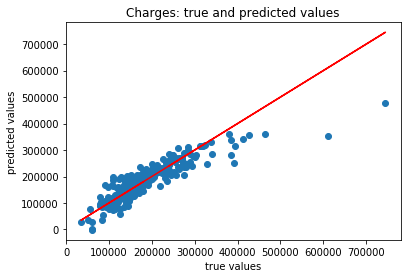

Mean absolute error of the prediction is: 24708.399652319487
Mean squared error of the prediction is: 1426629033.5100424
Root mean squared error of the prediction is: 37770.74308919594
Mean absolute percentage error of the prediction is: 14.853282331418082


In [226]:
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

The evaluation metrics are given above. Now, let's try another model specification and compare this two models:

In [227]:
houseprices_df4['sfxoverall'] = houseprices_df4['totalbsmtsf'] * houseprices_df4['overallqual']

# Y is the target variable
Y = np.log1p(houseprices_df4['saleprice'])
# X is the feature set
X = houseprices_df4[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'sfxoverall','interest'] + dummy_column_names]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     421.8
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:07:38   Log-Likelihood:                 479.88
No. Observations:                1168   AIC:                            -929.8
Df Residuals:                    1153   BIC:                            -853.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.8172      0.082    120.079      0.000       9.657       9.978
overallqual         0.1697      0.008     21.417      0.000       0.154       0.185
grlivarea           0.0002   1.18e-05     18.327      0.000       0.000       0.000
garagecars          0.0804      0.015      5.484      0.000       0.052       0.109
garagearea       9.349e-05   4.98e-05      1.879      0.061   -4.14e-06       0.000
totalbsmtsf         0.0004   4.01e-05     10.071      0.000       0.000       0.000
sfxoverall      -4.464e-05    5.5e-06     -8.112      0.000   -5.54e-05   -3.38e-05
interest            0.0062      0.007      0.922      0.357      -0.007       0.019
mszoning_FV         0.4538      0.064      7.119      0.000       0.329       0.579
mszoning_RH         0.3362      0.073      4.615      0.000       0.193       0.479
mszoning_RL         0.4429      0.059      7.520      0.000       0.327       0.558
mszoning_RM         0.2733      0.060      4.564      0.000       0.156       0.391
landcontour_HLS     0.1541      0.034      4.529      0.000       0.087       0.221
landcontour_Low     0.2060      0.039      5.291      0.000       0.130       0.282
landcontour_Lvl     0.0785      0.023      3.382      0.001       0.033       0.124
==============================================================================
Omnibus:                      342.481   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2376.985
Skew:                          -1.168   Prob(JB):                         0.00
Kurtosis:                       9.587   Cond. No.                     2.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model's R-squared and adjusted R-squared values are higher than those of the first model. 
AIC and BIC criterias are lower than the first model. Cumulatively, the second model has a better goodness of fit than the first model. Let's evaluate the test set performance of this second model:

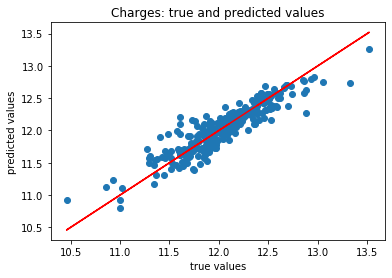

Mean absolute error of the prediction is: 0.12290048109024683
Mean squared error of the prediction is: 0.02751854131661043
Root mean squared error of the prediction is: 0.16588713427089646
Mean absolute percentage error of the prediction is: 1.0272079263217921


In [228]:
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

The test set evaluation metrics are given above. For every metric, the second model achieves a better prediction performance in the test set.

It should be noted that for this model too, 'garagearea' and 'interest' was not crucial to the model. 

## Overfitting and Regularization

In [229]:
# import new libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV


# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

In [232]:
# remake the model, usuing a new variable showing interaction between totalbsmtsf and overallqual
houseprices_df4['sfxoverall'] = houseprices_df4['totalbsmtsf'] * houseprices_df4['overallqual']

# Y is the target variable
Y = np.log1p(houseprices_df4['saleprice'])
# X is the feature set
X = houseprices_df4[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'sfxoverall'] + dummy_column_names]

# good practice to add a constant to the model
X = sm.add_constant(X)

#split the data, 20/80, between test and training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [233]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [234]:
# let's see all the alphas (lambdas) we will use for the new regression models
alphas

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1.0,
 10.0,
 100.0,
 1000.0,
 10000.0,
 100000.0,
 1000000.0,
 10000000.0,
 100000000.0,
 1000000000.0,
 10000000000.0,
 100000000000.0,
 1000000000000.0,
 10000000000000.0,
 100000000000000.0,
 1000000000000000.0,
 1e+16,
 1e+17,
 1e+18,
 1e+19,
 1e+20,
 1e+21,
 1e+22,
 1e+23,
 1e+24,
 1e+25,
 1e+26,
 1e+27,
 1e+28,
 1e+29,
 1e+30,
 1e+31,
 1e+32,
 1e+33,
 1e+34,
 1e+35,
 1e+36,
 1e+37,
 1e+38,
 1e+39]

In [235]:
# How many observations per set?
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))


The number of observations in training set is 1168
The number of observations in test set is 292


**Try OLS, Lasso, Ridge, and ElasticNet regression using the same model specification. This time, you need to do k-fold cross-validation to choose the best hyperparameter values for your models. Which model is the best? Why?**

In [236]:
# make a OLS regression model
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8360139252598014
-----Test set statistics-----
R-squared of the model in test set is: 0.8341863760501238
Mean absolute error of the prediction is: 0.12420201230260862
Mean squared error of the prediction is: 0.02764870030820315
Root mean squared error of the prediction is: 0.16627898336291075
Mean absolute percentage error of the prediction is: 1.038090219899806


- OLS regression provides high R-squared values for both training and test sets
- Training data R-squared: .84
- Testing data R-squared: .83

In [237]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
# use the same parameters but make a LASSO model that utitlizes cross-validation
# returns best alpha value (which is the lambda parameter of the Lasso equation)

lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.8358227579564813
-----Test set statistics-----
R-squared of the model in test set is: 0.8319247435446299
Mean absolute error of the prediction is: 0.12461795052557714
Mean squared error of the prediction is: 0.028025817687717162
Root mean squared error of the prediction is: 0.16740913262936752
Mean absolute percentage error of the prediction is: 1.0419310506892687


- Lasso regression provides high R-squared values for both training and test sets
- Training data R-squared: .84
- Testing data R-squared: .83
- Not much difference with OLS model and alpha was very low at .0001

In [238]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
# use the same parameters but make a Ridge model that utitlizes cross-validation
# cv = 5 so there is a 5-fold cross-validation conducted here
# returns best alpha value (which is the lambda parameter of the Ridge equation)

ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1.0
R-squared of the model in training set is: 0.8352917610551234
-----Test set statistics-----
R-squared of the model in test set is: 0.8293316014460841
Mean absolute error of the prediction is: 0.12507900818577364
Mean squared error of the prediction is: 0.028458212849413557
Root mean squared error of the prediction is: 0.16869562190351461
Mean absolute percentage error of the prediction is: 1.0461815104784817


- Ridge regression provides high R-squared values for both training and test sets
- Training data R-squared: .84
- Testing data R-squared: .83
- Not much difference with OLS model and Lasso model; optimal alpha was 1

In [239]:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html
# use the same parameters but make a Ridge model that utitlizes cross-validation
# cv = 5 so there is a 5-fold cross-validation conducted here
# returns best alpha value (which is the lambda parameter of the ElasticNet equation)

elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.8359324275443344
-----Test set statistics-----
R-squared of the model in test set is: 0.8327416754516006
Mean absolute error of the prediction is: 0.1244843555764287
Mean squared error of the prediction is: 0.02788959784685008
Root mean squared error of the prediction is: 0.1670017899510364
Mean absolute percentage error of the prediction is: 1.040694523424834


- ElasticNet regression provides high R-squared values for both training and test sets
- Training data R-squared: .84
- Testing data R-squared: .83
- Not much difference with OLS model, Ridge, Lasso model; optimal alpha was .0001

The models are so similar that it isn't clear that one is better than another. If we look at the minute differences in the test set statistics, OLS wins out by a small margin as the best model.

Concluding remarks: Adding in interest data was not useful to the model in this dataset. Generally, it is thought that low interest rates can help to boost house prices since more a lower interest rate means lower monthly payments; more people would be willing to push the price of a house up since the monthly payments could still fit their budget. We also note that while garagearea showed >.6 correlation with 'saleprice', it also did not contribute greatly to the overall model. Finally, we note that we were able to use our independent variables to do a better job at predicting the log of the saleprice than the saleprice itself. In comparing the models, we get a greater R value for the model that predicts the log of the saleprice than the model that predicts the saleprice. These were our observations in comparing the different models we worked with in this project.